## 本内容是对kmer的内容进行深入的特征工程

In [1]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import os


In [2]:
path_name = 'Antioxidant'

In [3]:
# path
df_row_data_dir_path = os.path.abspath(os.path.dirname(os.path.dirname(os.getcwd())))


path_data = df_row_data_dir_path + '\\new_data\\' + path_name+r'\merge_data.csv'


In [4]:
# 数据载入
df_row_train = pd.read_csv(path_data)

# 数据合并

In [5]:
df_row_train.head()

,label,g********c**g,g*h***h,g******g*********c,g******c****g,a*******g**g,d******************h,g******c*g,g*************c*g,b****h,...,g*********g***********h,h**************g***g,g**********g****h,g***********h*******g,g*g**h,h****g*****g,g*********g**h,a******************a,h***g***********g,g********h*******g
0,1,3,0,0,2,1,3,3,1,1,...,1,2,0,2,1,0,1,1,0,2
1,1,3,3,3,3,2,3,3,2,5,...,3,5,7,4,6,3,4,8,3,7
2,1,1,2,2,3,1,1,1,2,0,...,2,1,2,3,1,3,3,0,1,3
3,1,4,9,4,0,6,10,3,3,13,...,7,11,8,9,16,7,9,21,16,9
4,1,4,3,4,0,1,2,6,6,2,...,6,5,2,5,3,3,5,4,6,6


In [6]:
df_data_label = df_row_train.label
df_data_features = df_row_train.drop('label',axis = 1)

In [7]:
df_data_features.head()

,g********c**g,g*h***h,g******g*********c,g******c****g,a*******g**g,d******************h,g******c*g,g*************c*g,b****h,h***********b,...,g*********g***********h,h**************g***g,g**********g****h,g***********h*******g,g*g**h,h****g*****g,g*********g**h,a******************a,h***g***********g,g********h*******g
0,3,0,0,2,1,3,3,1,1,2,...,1,2,0,2,1,0,1,1,0,2
1,3,3,3,3,2,3,3,2,5,3,...,3,5,7,4,6,3,4,8,3,7
2,1,2,2,3,1,1,1,2,0,1,...,2,1,2,3,1,3,3,0,1,3
3,4,9,4,0,6,10,3,3,13,14,...,7,11,8,9,16,7,9,21,16,9
4,4,3,4,0,1,2,6,6,2,1,...,6,5,2,5,3,3,5,4,6,6


# 特征工程

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
train_X,test_X,train_Y,test_Y=train_test_split(df_data_features,df_data_label, test_size=0.2, random_state=0)

## 2. Model Predict

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
test_Y.head()

1715    0
724     0
206     1
1505    0
342     0
Name: label, dtype: int64

In [12]:
logistic_model = LogisticRegression()
logistic_model.fit(train_X,train_Y)
predict_Y = logistic_model.predict(test_X)
print('Accuracy for LogisticRegression is:{}'.format(metrics.accuracy_score(predict_Y,test_Y)))

Accuracy for LogisticRegression is:0.8033240997229917


In [13]:
from sklearn.svm import SVC

In [14]:
svc_model= SVC(kernel = 'rbf',C=1,gamma=0.1)
svc_model.fit(train_X,train_Y)
predict_SVC_Y = svc_model.predict(test_X)
print('Accuracy for SVC is:{}'.format(metrics.accuracy_score(predict_SVC_Y,test_Y)))

Accuracy for SVC is:0.8393351800554016


In [15]:
svc_linear_model = SVC(kernel='linear', C=0.1, gamma=0.1)
svc_linear_model.fit(train_X,train_Y)
predict_SVC_linear_Y = svc_linear_model.predict(test_X)
print('Accuracy for SVC_linear is:{}'.format(metrics.accuracy_score(predict_SVC_linear_Y, test_Y)))

Accuracy for SVC_linear is:0.8254847645429363


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_X,train_Y)
predict_knn_Y = knn_model.predict(test_X)
print('Accuracy for knn is: {}'.format(metrics.accuracy_score(predict_knn_Y,test_Y)))

Accuracy for knn is: 0.8614958448753463


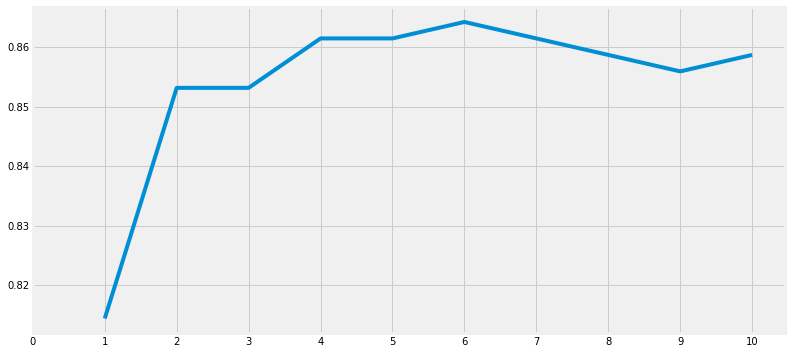

Accuracies for different values of n are: [0.81440443 0.8531856  0.8531856  0.86149584 0.86149584 0.86426593
 0.86149584 0.85872576 0.85595568 0.85872576] with the max value as  0.8642659279778393


In [18]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
decisionTree_model = DecisionTreeClassifier()
decisionTree_model.fit(train_X,train_Y)
predict_decisionTree_Y = decisionTree_model.predict(test_X)
print('Accuracy for DecisionTree is:{}'.format(metrics.accuracy_score(predict_decisionTree_Y,test_Y)))

Accuracy for DecisionTree is:0.7617728531855956


In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(train_X,train_Y)
predict_gaussianNB_Y = gaussianNB_model.predict(test_X)
print('Accuracy for GaussianNB is:{}'.format(metrics.accuracy_score(predict_gaussianNB_Y, test_Y)))

Accuracy for GaussianNB is:0.631578947368421


In [23]:
from sklearn.ensemble import RandomForestClassifier

d:\develop\pythom3_7_0\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [24]:
rf_model = RandomForestClassifier()
rf_model.fit(train_X,train_Y)
predict_rf = rf_model.predict(test_X)
print('Accuracy for DecisionTree is:{}'.format(metrics.accuracy_score(predict_rf, test_Y)))

Accuracy for DecisionTree is:0.850415512465374


In [25]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[SVC(kernel='linear'),SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=10),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,train_X,train_Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.842763,0.021011
Radial Svm,0.873932,0.022454
Logistic Regression,0.840714,0.018088
KNN,0.883625,0.022684
Decision Tree,0.781877,0.026527
Naive Bayes,0.691858,0.027365
Random Forest,0.860776,0.027929
